## Student Performance Indicator
Life Cycle of Machine Learning Project

- Understanding the problem statement
- Data collection
- Data checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

1) Problem Statement
- This project understands how the student's performance(test scores) is affected by other variables such as Gender, Parent level of education, Lunch and Test preparation course.

2) Data collection
- Dataset Source - from kaggle
- The data consists of 8 features and 1000 records.

2.1 Import Data and Required Packages
importing Pandas ,NumPy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data\stud.csv')

In [3]:
#Show Top 5 Records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Shape of the dataset
df.shape

(1000, 8)

2.2 Dataset Information
- gender : sex of students ->(Male/Female)
- race/ethnicity : ethinicity of Students -> (Group A,B,C,D,E)
- parental level of education : parents' final education->(bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch : Having lunch before test(standerd or free/reduced)
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score

3. Data checks to perform
- check missing values
- check Duplicates
- check data type
- check the number of unique values of each column
- check statistics of data set
- check various categories present in the different categorical column

3.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values

3.2 Check Duplicates


In [6]:
df.duplicated().sum()

0

There are no dupicates values in the data set
3.3 Check Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Checking the number of unique values of each column


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 Check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
- From above description of numerical data, all means are very close to each other that is between 66 and 68.05.
- All sd are close b/w 14.6 and 15.6
- While there is a min score 0 for math, for writing min is much higher = 10 and for reading myet higher = 17

3.7 Exploring Data


In [10]:
print("Categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())


print("Categories in 'race/ethnicity' variable:   ",end=" ")
print(df['race_ethnicity'].unique())


print("Categories in 'parentel level of education' variable:   ",end="")
print(df['parental_level_of_education'].unique())


print("Categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())


print("Categories in 'test preparation course' variable:   ",end=" ")
print(df['test_preparation_course'].unique())





Categories in 'gender' variable:    ['female' 'male']
Categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parentel level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:    ['none' 'completed']


In [11]:
#define numerical & Categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features =[feature for feature in df.columns if df[feature].dtype == 'O']

#Print columns
print("we have {} numerical features {}".format(len(numerical_features),numerical_features))
print("\nwe have {} categorical features {}".format(len(categorical_features),categorical_features))


we have 3 numerical features ['math_score', 'reading_score', 'writing_score']

we have 5 categorical features ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


3.8 Adding columns for "Total Score" and "Average"

In [12]:
df['total_score'] = df['math_score'] + df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full = df[df['reading_score'] == 100]['total_score'].count()
writing_full = df[df['writing_score']==100]['total_score'].count()
math_full = df[df['math_score']==100]['average'].count()
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing : {writing_full}')
print(f'Number of students with full marks in Reading : {reading_full}')



Number of students with full marks in Maths: 7
Number of students with full marks in Writing : 14
Number of students with full marks in Reading : 17


In [23]:
reading_less_20 = df[df['reading_score'] <=20]['total_score'].count()
writing_less_20 = df[df['writing_score']<=20]['total_score'].count()
math_less_20= df[df['math_score']<=20]['average'].count()
print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing : {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')



Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing : 3
Number of students with less than 20 marks in Reading: 1


### Insights
- From above values we get students have performed the worst in Maths
- Best performance in reading section
4. Exploring Data (Visualization)
4.1 Visualize average score distribution to make some conclusions
- Histogram
- Kernel Distribution Function 
4.11 Histogram & KDE

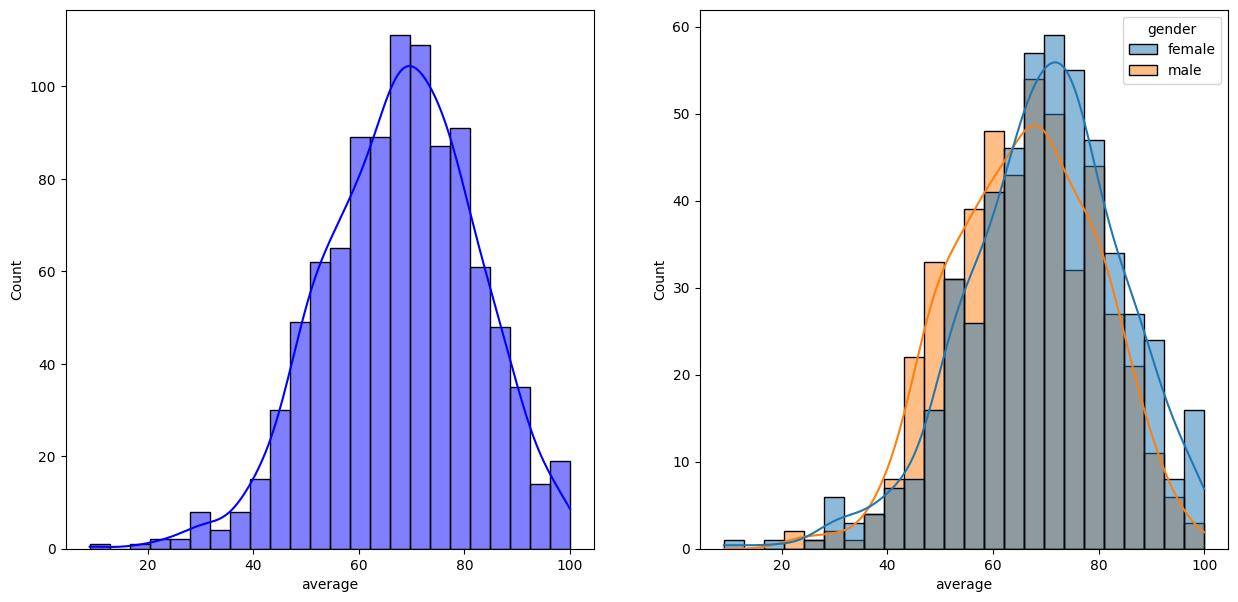

In [38]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()


### Insights
- Female students tend to perform well then male students.

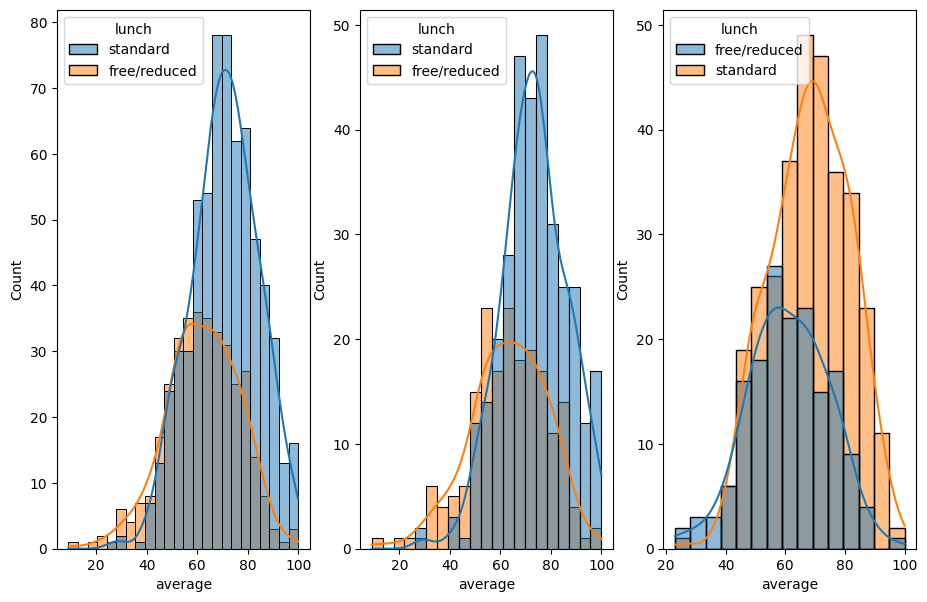

In [51]:
fig,axs = plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='average',hue='lunch',kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',hue='lunch',kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',hue='lunch',kde=True)

plt.show()


### Insights
- Standerd lunch helps perform well in exams.
- Standed lunch helps perform well in exams be it a male or a female.

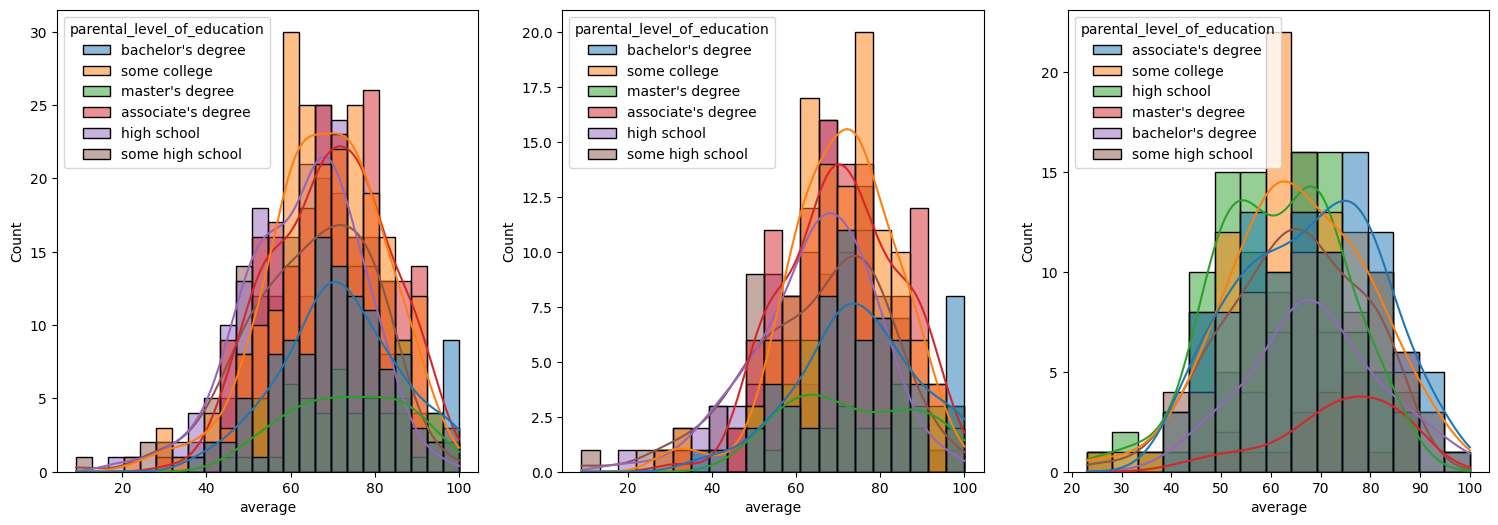

In [54]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',hue='parental_level_of_education',kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',hue='parental_level_of_education',kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',hue='parental_level_of_education',kde=True)

plt.show()


### Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child